<a href="https://colab.research.google.com/github/MoffatKirui/Binary_Beast/blob/main/Binary_Beasts_Secondary_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Needs Basic Rights Kenya - Tech4MentalHealth


## 1. Defining the Question

### a) Specifying the Question


> The objective of this challenge is to develop a machine learning model that classifies statements and questions expressed by university students in Kenya when speaking about the mental health challenges they struggle with. The four categories are depression, suicide, alchoholism, and drug abuse.



### b) Defining the Metric for Success

> 

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [37]:
# Loading the Dataset
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing


train= pd.read_csv("/content/Train.csv")
test=pd.read_csv("/content/Test.csv")
samplesubmission=pd.read_csv("/content/SampleSubmission.csv")

## 3. Checking the Data

In [38]:
# Determining the no. of records in our dataset
#
print('train',train.shape)
print('test',test.shape)


train (616, 3)
test (309, 2)


In [39]:
# Previewing the top of our dataset
#
train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [40]:
test.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [41]:
samplesubmission.head()

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0,0,0,0
1,03BMGTOK,0,0,0,0
2,03LZVFM6,0,0,0,0
3,0EPULUM5,0,0,0,0
4,0GM4C5GD,0,0,0,0


In [42]:
# Previewing the bottom of our dataset
# 
train.tail()

,ID,text,label
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression
615,ORF71PVQ,I feel so discouraged with life,Depression


In [43]:
test.tail()

,ID,text
304,Z9A6ACLK,Yes
305,ZDUOIGKN,My girlfriend dumped me
306,ZHQ60CCH,How can I go back to being my old self?
307,ZVIJMA4O,Is it true bhang is medicinal?
308,ZYIFAY98,how can I overcome the problem?


In [44]:
samplesubmission.tail()

,ID,Depression,Alcohol,Suicide,Drugs
304,Z9A6ACLK,0,0,0,0
305,ZDUOIGKN,0,0,0,0
306,ZHQ60CCH,0,0,0,0
307,ZVIJMA4O,0,0,0,0
308,ZYIFAY98,0,0,0,0


In [45]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

ID       object
text     object
label    object
dtype: object

In [46]:
test.dtypes

ID      object
text    object
dtype: object

## 5. Tidying the Dataset

In [47]:
# Identifying the Missing Data
#
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [48]:
test.isnull().any()

ID      False
text    False
dtype: bool

In [49]:
# More data cleaning procedures
#checking for duplicates

In [50]:
train.duplicated().any()

False

In [51]:
test.duplicated().any()

False

In [52]:
# Expand contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions
train['text']=train['text'].apply(lambda x:expand_contractions(x))
test['text']=test['text'].apply(lambda x:expand_contractions(x))

In [53]:
# Lowercase the text
train['text']=train['text'].apply(lambda x: x.lower())
test['text']=test['text'].apply(lambda x: x.lower())

In [54]:
#Remove digits and words containing digits
train['text']=train['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
test['text']=test['text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [55]:
# Remove Punctuations
train['text']=train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
test['text']=test['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [56]:
# Removing extra spaces
train['text']=train['text'].apply(lambda x: re.sub(' +',' ',x))
test['text']=test['text'].apply(lambda x: re.sub(' +',' ',x))

In [89]:
# correcting errors in the text
from textblob import TextBlob

train['text']=train['text'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [69]:
test['text']=test['text'].apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [70]:
import itertools
train['text']=train['text'].apply(lambda txt: ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt)))

In [71]:
import itertools
test['text']=test['text'].apply(lambda txt: ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt)))

In [74]:
!pip install wordsegment
from wordsegment import load, segment
load()
train['text']=train['text'].apply(lambda txt: ' '.join(segment(txt)))

     |████████████████████████████████| 4.8MB 6.6MB/s 


In [77]:
test['text']=test['text'].apply(lambda txt: ' '.join(segment(txt)))

In [90]:
#checking data after cleaning
for index,text in enumerate(train['text'][35:40]):
  print('Text %d:\n'%(index+1),text)

Text 1:
 stress
Text 2:
 main challenge depression effect health
Text 3:
 feel confused helpless push corner feel e kind better
Text 4:
 avoid bad company
Text 5:
 avoid depression camp


In [79]:
for index,text in enumerate(test['text'][35:40]):
  print('Text %d:\n'%(index+1),text)

Text 1:
 limit take hang
Text 2:
 find money school fee tell father
Text 3:
 seek assistance fear
Text 4:
 feel like break apart
Text 5:
 stop smoke hang


In [80]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train['text']=train['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [81]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
test['text']=test['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [82]:
train_group=train[['text','label']].groupby(by='label').agg(lambda x:' '.join(x))
train_group.head()

,text
label,
Alcohol,manage alcohol stop life unbearable stop alcoh...
Depression,feel dream happy stress lack financial support...
Drugs,hallucination heaven open smoke hang meditatio...
Suicide,life important cause suicide youth deal overco...


In [91]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(train_group['text'])
train_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
train_dtm.index=train_group.index
train_dtm.head()

,abandon,able,absentminde,abuse,academic,accept,ad,add,addict,addition,adduct,adult,advantage,advice,advise,affair,affect,affected,alcohol,alcoholism,alive,angry,anxiety,anybody,apart,appetite,approach,arise,arousal,ask,aspect,assistance,associate,avoid,away,awful,background,bad,bankrupt,barrow,...,uncle,uncomfortable,understand,uneasy,unexpected,unfair,unmoved,unpreparedness,unsatisfied,unstable,unwanted,unworthiness,unworthy,usage,use,useless,userid,utilize,value,view,village,want,waste,way,ways,weak,weather,weed,well,withdraw,withdrawal,wonder,work,world,worry,worth,worthless,wrong,young,youth
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcohol,0,0,0,1,0,0,0,1,0,7,5,1,0,0,1,0,1,0,84,12,0,0,0,0,0,0,0,0,0,2,0,0,0,12,2,0,0,4,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Depression,2,0,1,0,2,0,2,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,2,2,2,2,1,1,1,0,1,2,2,7,0,2,1,6,0,1,...,1,1,1,1,1,1,3,1,1,2,5,1,4,0,1,1,0,0,0,1,0,10,4,6,0,3,1,0,1,3,0,1,2,11,1,1,1,0,1,0
Drugs,0,0,0,2,0,0,0,0,1,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,2,0,0,0,14,0,1,0,0,0,0,0,1,0,0,2,0
Suicide,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,4,0,3,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,5,0,0,0,0,0,0,1,0,0,0,0,3,0,1,0,2


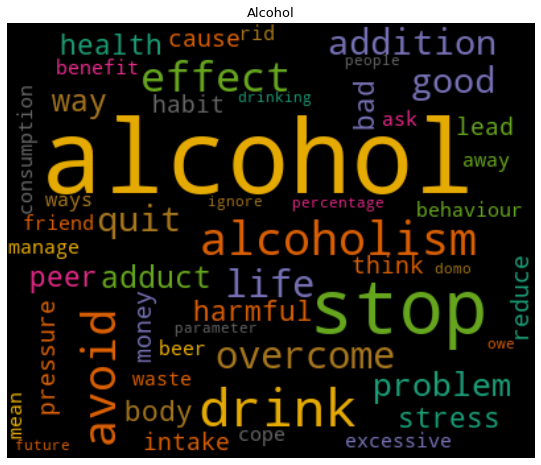

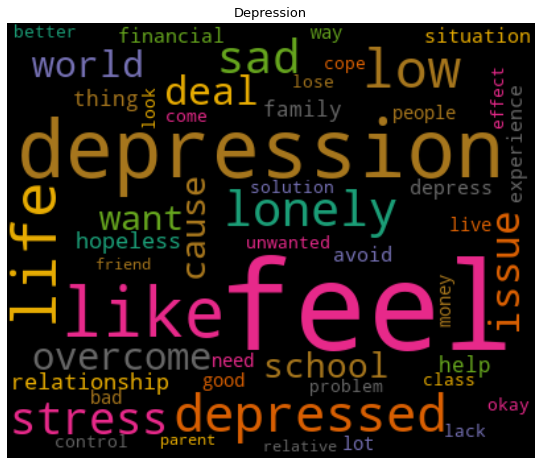

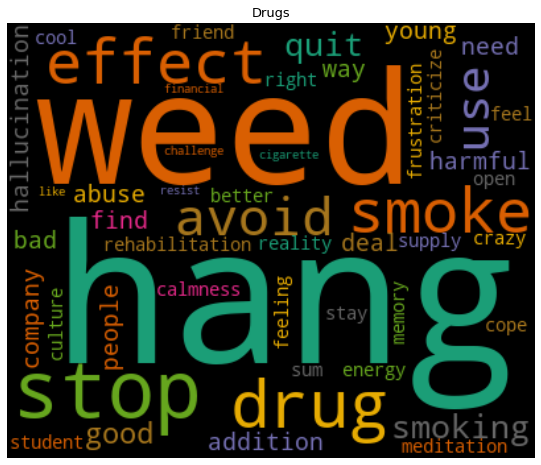

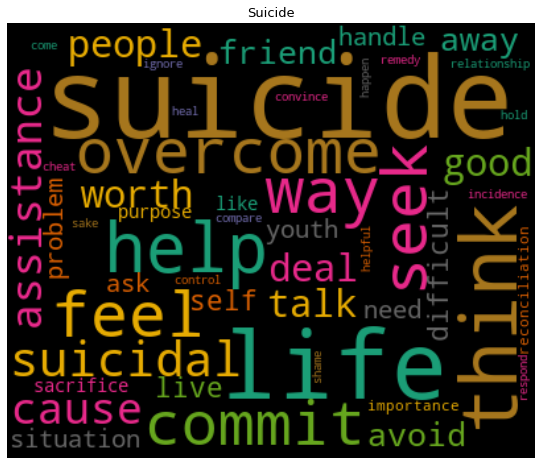

In [84]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=50,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
train_dtm=train_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(train_dtm.columns):
  generate_wordcloud(train_dtm[product].sort_values(ascending=False),product)

## 6. Exploratory Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


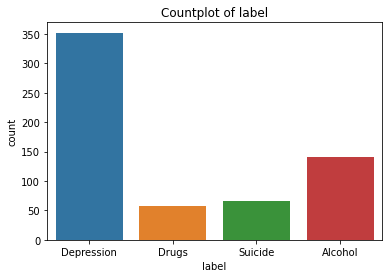

In [92]:
# Ploting the univariate summaries and recording our observations
#
import seaborn as sns
sns.countplot(train['label']).set_title('Countplot of label')
sns.set_theme(style='darkgrid')

## 7. Implementing the Solution

In [101]:
# Implementing the Solution
# 
# Importing required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

#label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train['label']=le.fit_transform(train['label'])
# creating lists for text and labels
text = train['text'].values.tolist() # text
labels = train['label'].values.tolist() # labels


In [106]:
#Splitting data to train and test sets
training_size = 500

training_text = text[0:training_size]
testing_text = text[training_size:]

training_labels = labels [0:training_size]
testing_labels = labels [training_size:]

In [104]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

In [107]:
vocab_size = 10000
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# fitting tokenizer only to training set
tokenizer.fit_on_texts(training_text)

word_index = tokenizer.word_index

# creating training sequences and padding them
traning_sequences = tokenizer.texts_to_sequences(training_text)
training_padded = pad_sequences(traning_sequences,maxlen = max_length,
                                padding = padding_type,
                                truncating=trunc_type,
                                )

# creating  testing sequences and padding them using same tokenizer
testing_sequences = tokenizer.texts_to_sequences(testing_text)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,
                                padding = padding_type,
                                truncating=trunc_type,
                                )

import numpy as np
# converting all variables to numpy arrays, to be able to work with tf version 2
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [108]:
embedding_dim = 16

# creating a model for sentiment analysis
model  = tf.keras.Sequential([
                # addinging an Embedding layer for Neural Network to learn the vectors
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                # Global Average pooling is similar to adding up vectors in this case
                tf.keras.layers.GlobalAveragePooling1D(),
                tf.keras.layers.Dense(24, activation = 'relu'),
                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


num_epochs = 10

history = model.fit(training_padded,training_labels, epochs = num_epochs,
                    validation_data = (testing_padded,testing_labels))

Epoch 1/10
16/16 [==============================] - 1s 15ms/step - loss: 0.6524 - accuracy: 0.5860 - val_loss: 0.5949 - val_accuracy: 0.5086
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.5860 - val_loss: 0.4876 - val_accuracy: 0.5086
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4998 - accuracy: 0.5860 - val_loss: 0.3624 - val_accuracy: 0.5086
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.5860 - val_loss: 0.2236 - val_accuracy: 0.5086
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.5860 - val_loss: 0.0659 - val_accuracy: 0.5086
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.5860 - val_loss: -0.0902 - val_accuracy: 0.5086
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.5860 - val_loss: -0.2390 - val_accuracy: 0.5086
Epoch 8/10
16/16 

In [109]:
# forming new sentences for testing, feel free to experiment
# sentence 1 is bit sarcastic, whereas sentence two is a general statment.
pred_text = test['text'].values.tolist()

# Converting the sentences to sequences using tokenizer
new_sequences = tokenizer.texts_to_sequences(pred_text)
# padding the new sequences to make them have same dimensions
new_padded = pad_sequences(new_sequences, maxlen = max_length,
                           padding = padding_type,
                           truncating = trunc_type)

new_padded = np.array(new_padded )

print(model.predict(new_padded))

[[0.95075643]
 [0.9533248 ]
 [0.9512436 ]
 [0.9518043 ]
 [0.9510701 ]
 [0.9503719 ]
 [0.9525378 ]
 [0.9520844 ]
 [0.94778216]
 [0.9485625 ]
 [0.95174074]
 [0.94783854]
 [0.9530446 ]
 [0.9529524 ]
 [0.9440551 ]
 [0.9515494 ]
 [0.95138437]
 [0.95296395]
 [0.9522526 ]
 [0.9540297 ]
 [0.9490947 ]
 [0.9532277 ]
 [0.9519889 ]
 [0.95123124]
 [0.9515964 ]
 [0.9531979 ]
 [0.95058644]
 [0.9528123 ]
 [0.9527692 ]
 [0.95175266]
 [0.95154166]
 [0.95278096]
 [0.9521791 ]
 [0.95001423]
 [0.95320934]
 [0.9529339 ]
 [0.9488647 ]
 [0.9519702 ]
 [0.9516952 ]
 [0.9519135 ]
 [0.9432042 ]
 [0.95006394]
 [0.9503955 ]
 [0.9524858 ]
 [0.95080733]
 [0.9490996 ]
 [0.95181775]
 [0.95321655]
 [0.9520503 ]
 [0.9485869 ]
 [0.950371  ]
 [0.9527692 ]
 [0.9500439 ]
 [0.9521048 ]
 [0.9506049 ]
 [0.9528645 ]
 [0.95070654]
 [0.9527751 ]
 [0.95070654]
 [0.9490597 ]
 [0.9502311 ]
 [0.9474604 ]
 [0.9519797 ]
 [0.95169234]
 [0.9532519 ]
 [0.9521735 ]
 [0.9522159 ]
 [0.95187676]
 [0.953826  ]
 [0.95137125]
 [0.9492377 ]
 [0.95